# ДЗ

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

#### 1. 
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): \
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110] \
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].\
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [3]:
x = np.array((35, 45, 190, 200, 40, 70, 54, 150, 120, 110))
y = np.array((401, 574, 874, 919, 459, 739, 653, 902, 746, 832))

In [4]:
# c использованием intercept
n = len(x)
b = (n*np.sum(x*y) - np.sum(x)*np.sum(y)) / (n*np.sum(x**2)-np.sum(x)**2)
b

2.6205388824027653

In [5]:
a = np.mean(y) - b*np.mean(x)
a

444.17735732435955

In [6]:
y_hat = a + b*x
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [7]:
calc_mse(y, y_hat)

6470.414201176658

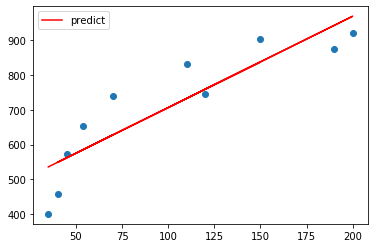

In [8]:
plt.scatter(x, y)
plt.plot(x, y_hat, label='predict', color='r')
plt.legend()
plt.show()

In [9]:
# без использования intercept 
# матричный метод
X=x.reshape((n,1))
y_=y.reshape((n,1))
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y_)
B

array([[5.88982042]])

In [10]:
y_hat_=X*B
y_hat_

array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

In [11]:
calc_mse(y, y_hat_)

164392.9244883353

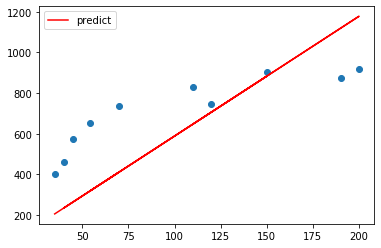

In [12]:
plt.scatter(x, y)
plt.plot(x, y_hat_, label='predict', color='r')
plt.legend()
plt.show()

#### 2. 
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [13]:
X=x.reshape((1,n))
X

array([[ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]])

In [14]:
n = X.shape[1]
alpha = 1e-6
W = np.array([0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    #W_prev = W.copy()
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    #weight_dist = np.linalg.norm(W - W_prev, ord=2)
    err_new =  calc_mse(y, np.dot(W, X))
        
    if i % 10 == 0:
        #alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,5)}')
    # Уменьшаем шаг каждые 150 итераций
    if i % 200 == 0:
        alpha /= 1.1
    # Выход из алгоритма при достижении определенного прироста ошибки
    if err - err_new < 1e-5:
        print(f'End of computation. Iteration #{i}.')
        break

Number of objects = 10        
Learning rate = 1e-06        
Initial weights = [0.5] 

Iteration #0: W_new = [0.6485068], MSE = 456729.35
Iteration #10: W_new = [1.82285132], MSE = 296244.24376
Iteration #20: W_new = [2.73407764], MSE = 200854.33202
Iteration #30: W_new = [3.44113879], MSE = 143421.01523
Iteration #40: W_new = [3.98977909], MSE = 108840.9866
Iteration #50: W_new = [4.41549357], MSE = 88020.69541
Iteration #60: W_new = [4.74582444], MSE = 75485.00523
Iteration #70: W_new = [5.00214289], MSE = 67937.39089
Iteration #80: W_new = [5.20103182], MSE = 63393.0474
Iteration #90: W_new = [5.35535861], MSE = 60656.94339
Iteration #100: W_new = [5.47510766], MSE = 59009.56239
Iteration #110: W_new = [5.56802628], MSE = 58017.69068
Iteration #120: W_new = [5.64012599], MSE = 57420.49459
Iteration #130: W_new = [5.69607137], MSE = 57060.92876
Iteration #140: W_new = [5.73948189], MSE = 56844.43776
Iteration #150: W_new = [5.77316605], MSE = 56714.09068
Iteration #160: W_new = [5.79

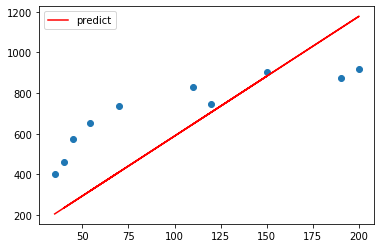

In [15]:
plt.scatter(x, y)
plt.plot(x, W*x, label='predict', color='r')
plt.legend()
plt.show()

#### 3. 
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? 

Таблица значений функции Лапласа используется при нормальном распределении и известном СКО генеральной осовкупности (критерий Z), а таблица критических точек распределения Стьюдента используется при нормальном распределении и наличии выборки, по которой можем рассчитать СКО данной выборки (критерий t).